<a href="https://colab.research.google.com/github/haneulee/creative-coding-HEAD/blob/main/OpenCellID_Haneul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open cell id analysis


Pandas is a powerful and flexible Python library used for data manipulation and analysis. This handbook is designed to help you understand and master the fundamental concepts and operations of Pandas, making your data analysis tasks more efficient and insightful. And hopefully more fun.

## What Will You Learn?

- **Basics of Pandas**: Understand the core structures of Pandas.
- **Data Cleaning**: Techniques to handle missing data, remove duplicates, and fix data inconsistencies.
- **Data visualisation** *italicised text*: Plot your data to a map

I use pandas very often for quick and efficient analysis, not per se for visualisation since you can quickly reach its limits in terms of aesthetics. Nonetheless, it's great (plus really fast) for [data-crunching](https://www.netsuite.com/portal/resource/articles/erp/data-crunching.shtml). Once you did your analysis, you can export a clean CSV file which you can use later on.


Download file from https://opencellid.org/downloads.php


In [2]:
!wget -O 228.csv.zip https://drive.switch.ch/index.php/s/od5HKbs9OguK1iG/download

--2024-09-27 21:53:11--  https://drive.switch.ch/index.php/s/od5HKbs9OguK1iG/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.137, 86.119.34.138, 2001:620:5ca1:1ee::11, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851842 (832K) [application/zip]
Saving to: ‘228.csv.zip’

228.csv.zip         100%[===================>] 831.88K  1.56MB/s    in 0.5s    

2024-09-27 21:53:12 (1.56 MB/s) - ‘228.csv.zip’ saved [851842/851842]



In [3]:
!unzip 228.csv.zip

Archive:  228.csv.zip
  inflating: 228.csv                 
  inflating: __MACOSX/._228.csv      


## Import pandas and read CSV file

In [4]:
import pandas as pd

# read csv file
df = pd.read_csv("228.csv")

df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,1311685374,1692411826,0
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,1316704503,1713378502,0
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,1319115833,1688703716,0
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,1330183266,1692412072,0
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,1358870632,1695474376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,1726928394,1726949347,0
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,1726928474,1726928474,0
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,1726928484,1726928484,0
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,1726928504,1726928504,0


## Data cleaning

Check if values are missing:

In [5]:
# Check for missing values
df.isnull().sum()

,0
radio,0
mcc,0
mnc,0
lac,0
cid,0
psc,0
lon,0
lat,0
range,0
samples,0


Check for duplicates

In [6]:
# Check for duplicate rows
df.duplicated().sum()

0

If you have duplicates you could again delete them via:

In [7]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

## Filters

Find out the bounding box for a region and get its coordinates. Tools like http://bboxfinder.com/ can help! Next, we define a geographic area with 2 GPS points (2x lat, 2x lon)

In [8]:
# Define Geneva bounding box
min_lat = 46.1345
max_lat = 46.2836
min_lon = 6.0140
max_lon = 6.2410

In [9]:
# prompt: filter df for a specific area (like geneva)

# Filter the DataFrame based on the defined bounding box
geneva_df = df[(df['lat'] >= min_lat) & (df['lat'] <= max_lat) &
              (df['lon'] >= min_lon) & (df['lon'] <= max_lon)]

# Display the filtered DataFrame
geneva_df.to_csv("export.csv")

In [10]:
df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,1311685374,1692411826,0
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,1316704503,1713378502,0
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,1319115833,1688703716,0
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,1330183266,1692412072,0
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,1358870632,1695474376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,1726928394,1726949347,0
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,1726928474,1726928474,0
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,1726928484,1726928484,0
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,1726928504,1726928504,0


In [11]:
# prompt: add new column with area that is being calculated by range which is radius (pi * r2)

import numpy as np

# Assuming you want the area based on a radius calculated from the latitude and longitude
# This is a simplification and might not be entirely accurate for large areas or near the poles.
# You'll need more sophisticated geospatial calculations for better accuracy.

# Let's assume a radius of 1km for simplicity (you can adjust this based on your needs).
radius_km = 1

# Calculate the area using the formula pi * r^2
df['area'] = np.pi * (df['range']**2)
df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal,area
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,1311685374,1692411826,0,7.916939e+07
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,1316704503,1713378502,0,7.819462e+07
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,1319115833,1688703716,0,3.157353e+09
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,1330183266,1692412072,0,5.830439e+07
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,1358870632,1695474376,0,8.051528e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,1726928394,1726949347,0,3.141593e+06
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,1726928474,1726928474,0,3.141593e+06
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,1726928484,1726928484,0,3.141593e+06
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,1726928504,1726928504,0,3.141593e+06


In [12]:
# filter for results that fit into this area
df_geneva = df[
    (df['lat'] >= min_lat) & (df['lat'] <= max_lat) &
    (df['lon'] >= min_lon) & (df['lon'] <= max_lon)
]
df_geneva

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal,area
34,GSM,228,3,6001,11731,0,6.2100,46.2762,25411,79,1,1238362464,1694144273,0,2.028586e+09
126,LTE,228,1,1111,17030913,0,6.1243,46.2445,2711,21,1,1400350659,1680831676,0,2.308920e+07
127,LTE,228,1,4242,17030147,0,6.1348,46.2587,3036,48,1,1400350891,1714939015,0,2.895699e+07
144,LTE,228,1,3535,17042689,0,6.1616,46.2017,1000,59,1,1404735859,1692430288,0,3.141593e+06
145,LTE,228,1,1111,17033218,0,6.1171,46.1992,1000,3,1,1405092286,1718540463,0,3.141593e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,LTE,228,1,2727,17166857,-1,6.1119,46.2182,1000,2,1,1688841871,1722681911,0,3.141593e+06
39170,LTE,228,1,4242,19536386,-1,6.0299,46.2505,1000,2,1,1688885209,1722681914,0,3.141593e+06
39171,LTE,228,1,1111,18376965,-1,6.0544,46.2308,1000,3,1,1688886212,1722681915,0,3.141593e+06
39246,UMTS,228,1,1111,17474308,0,6.0843,46.1869,2672,3,1,1722839876,1722859923,0,2.242966e+07


You can be even more specific with the filters. The timestamps are in Unix time, so it's hard to read time. Pandas has couple of functions that help you deal with time in a more flexible way. We convert the timestamp to a datetime object:


In [13]:
# Convert 'created' and 'updated' columns to datetime
df_geneva['created'] = pd.to_datetime(df_geneva['created'], unit='s')
df_geneva['updated'] = pd.to_datetime(df_geneva['updated'], unit='s')
df_geneva

<ipython-input-13-7199fa1b6ddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geneva['created'] = pd.to_datetime(df_geneva['created'], unit='s')
<ipython-input-13-7199fa1b6ddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geneva['updated'] = pd.to_datetime(df_geneva['updated'], unit='s')


,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal,area
34,GSM,228,3,6001,11731,0,6.2100,46.2762,25411,79,1,2009-03-29 21:34:24,2023-09-08 03:37:53,0,2.028586e+09
126,LTE,228,1,1111,17030913,0,6.1243,46.2445,2711,21,1,2014-05-17 18:17:39,2023-04-07 01:41:16,0,2.308920e+07
127,LTE,228,1,4242,17030147,0,6.1348,46.2587,3036,48,1,2014-05-17 18:21:31,2024-05-05 19:56:55,0,2.895699e+07
144,LTE,228,1,3535,17042689,0,6.1616,46.2017,1000,59,1,2014-07-07 12:24:19,2023-08-19 07:31:28,0,3.141593e+06
145,LTE,228,1,1111,17033218,0,6.1171,46.1992,1000,3,1,2014-07-11 15:24:46,2024-06-16 12:21:03,0,3.141593e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,LTE,228,1,2727,17166857,-1,6.1119,46.2182,1000,2,1,2023-07-08 18:44:31,2024-08-03 10:45:11,0,3.141593e+06
39170,LTE,228,1,4242,19536386,-1,6.0299,46.2505,1000,2,1,2023-07-09 06:46:49,2024-08-03 10:45:14,0,3.141593e+06
39171,LTE,228,1,1111,18376965,-1,6.0544,46.2308,1000,3,1,2023-07-09 07:03:32,2024-08-03 10:45:15,0,3.141593e+06
39246,UMTS,228,1,1111,17474308,0,6.0843,46.1869,2672,3,1,2024-08-05 06:37:56,2024-08-05 12:12:03,0,2.242966e+07


In [14]:
# prompt: filter df for rows that have a timestamp in march 2024

# Filter the DataFrame for rows with timestamps in March 2024
df_geneva_march_2024 = df_geneva[
    (df_geneva['updated'].dt.year == 2024) & (df_geneva['updated'].dt.month == 3)
]

df_geneva_march_2024

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal,area
828,LTE,228,2,42000,8994305,0,6.1180,46.2088,5611,9,1,2015-09-29 13:16:35,2024-03-15 13:41:03,0,9.890777e+07
2090,LTE,228,1,2727,17783042,0,6.1376,46.2210,1000,40,1,2016-03-25 01:29:24,2024-03-18 20:29:03,0,3.141593e+06
2516,LTE,228,2,42010,8996352,0,6.1712,46.1954,1000,42,1,2016-03-25 01:30:17,2024-03-15 14:40:02,0,3.141593e+06
2557,LTE,228,2,42000,9075456,0,6.1212,46.2156,1000,11,1,2016-03-25 01:30:16,2024-03-15 13:41:03,0,3.141593e+06
2565,LTE,228,2,42010,8996096,0,6.1654,46.1962,1000,23,1,2016-03-25 01:30:17,2024-03-15 14:40:03,0,3.141593e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36790,LTE,228,3,46003,29073193,-1,6.1434,46.2116,1000,1,1,2024-03-23 04:16:01,2024-03-23 04:16:01,0,3.141593e+06
36791,LTE,228,2,41100,5205760,-1,6.1434,46.2116,1000,1,1,2024-03-23 04:16:20,2024-03-23 04:16:20,0,3.141593e+06
36792,LTE,228,3,46003,29074976,-1,6.1434,46.2116,1000,1,1,2024-03-23 04:16:40,2024-03-23 04:16:40,0,3.141593e+06
36793,LTE,228,3,46003,29074975,-1,6.1434,46.2116,1000,1,1,2024-03-23 04:17:40,2024-03-23 04:17:40,0,3.141593e+06


In [15]:
# filter for cell ids that have last updated timestamp in 2024
df_geneva_2024 = df_geneva[df_geneva['updated'].dt.year == 2024]

# count the entries in each df
num_entries = df_geneva.shape[0]
num_entries_2024 = df_geneva_2024.shape[0]
print(f"Number of cell towers in total: {num_entries}")
print(f"Number of cell towers updated in 2024: {num_entries_2024}")

Number of cell towers in total: 2431
Number of cell towers updated in 2024: 1027


## Export

The dataframe can be exported to CSV or JSON. You'll find the files in the folder (left-hand side)

In [16]:
df_geneva_2024.to_csv("geneva_2024.csv")

In [17]:
df_geneva_2024.to_json("geneva_2024.json")

## Visualise on a map

In [18]:
# prompt: visualize longitude, latitude and paint each point differently  with different size depending on samples value

import plotly.express as px

# Assuming df_geneva_2024 is your DataFrame with 'lon', 'lat', and 'samples' columns.
fig = px.scatter_mapbox(df_geneva_2024, lat="lat", lon="lon",
                        hover_name="radio",
                        hover_data=["mcc", "samples"],
                        color="radio",
                        size="samples",
                        zoom=10,
                        height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


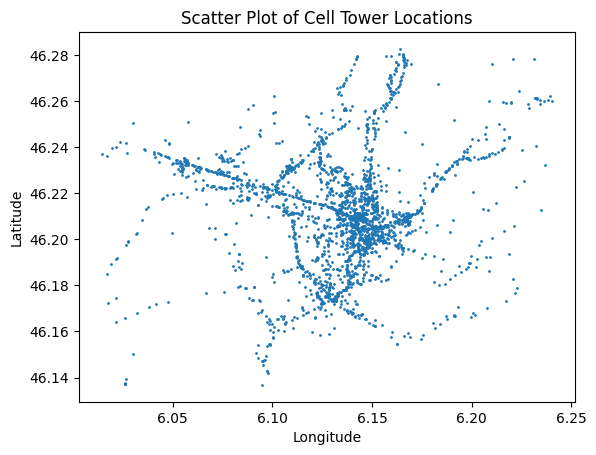

In [19]:
# prompt: plot lat lon o a scatter plot
import matplotlib.pyplot as plt

# Create a scatter plot of latitude and longitude
plt.scatter(df_geneva['lon'], df_geneva['lat'], s=1)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Cell Tower Locations')

# Display the plot
plt.show()


In [20]:
## Visualise with folium
import folium

# Create a map centered on Geneva
m = folium.Map(location=[46.2044, 6.1432], zoom_start=12)

# Add cell tower locations to the map
for idx, row in df_geneva.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save the map to an HTML file
m.save('geneva_cell_towers.html')

In [21]:
df_geneva_2024.to_csv("cell_towers_2024.csv")

In [22]:
df_geneva_2024

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal,area
127,LTE,228,1,4242,17030147,0,6.1348,46.2587,3036,48,1,2014-05-17 18:21:31,2024-05-05 19:56:55,0,2.895699e+07
145,LTE,228,1,1111,17033218,0,6.1171,46.1992,1000,3,1,2014-07-11 15:24:46,2024-06-16 12:21:03,0,3.141593e+06
174,UMTS,228,1,2727,7852354,16,6.1184,46.2133,1000,14,1,2014-08-22 22:12:24,2024-02-05 13:59:06,0,3.141593e+06
707,UMTS,228,1,1111,7303110,50,6.0516,46.2343,5535,78,1,2015-07-01 11:06:05,2024-08-03 10:45:15,0,9.624654e+07
708,UMTS,228,1,1111,7328596,204,6.0235,46.2420,3091,113,1,2015-07-01 11:06:05,2024-08-03 10:45:15,0,3.001566e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,LTE,228,1,2727,17166857,-1,6.1119,46.2182,1000,2,1,2023-07-08 18:44:31,2024-08-03 10:45:11,0,3.141593e+06
39170,LTE,228,1,4242,19536386,-1,6.0299,46.2505,1000,2,1,2023-07-09 06:46:49,2024-08-03 10:45:14,0,3.141593e+06
39171,LTE,228,1,1111,18376965,-1,6.0544,46.2308,1000,3,1,2023-07-09 07:03:32,2024-08-03 10:45:15,0,3.141593e+06
39246,UMTS,228,1,1111,17474308,0,6.0843,46.1869,2672,3,1,2024-08-05 06:37:56,2024-08-05 12:12:03,0,2.242966e+07
